# Matched Pairs t-Test #

In this notebook we will learn:

- How to tell if we have paired data
- How to run a matched pairs t-test
- What a matched pairs t-test is really doing



In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from scipy import stats

murder_rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder_rates.set_format("Population", NumberFormatter);

# Matching by Year

If we focus on just two states and ask the question "Did murder rates tend to be higher in one of these states than in the other?"

The matching is by year.

Let $\Delta_i = x_{1, i} - x_{2, i}$, then the null hypothesis is that these $\Delta$'s average to 0.  That is to say that there is no significant change.  In symbols, we write:

$H_o : \mu_{\Delta} = 0$


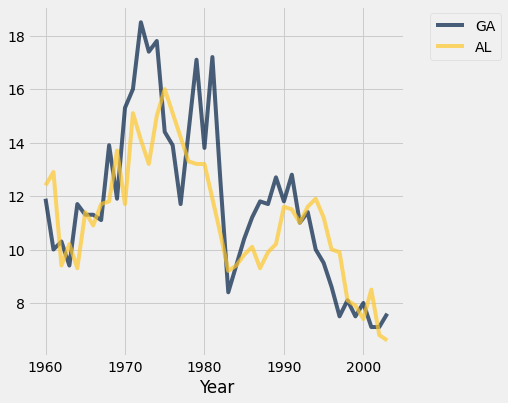

In [2]:
GA = murder_rates.where("State", "Georgia").select("Year", "Murder Rate")

AL = murder_rates.where("State", "Alabama").select("Year", "Murder Rate")

Table().with_columns("GA", GA.column("Murder Rate"), "AL", AL.column("Murder Rate"), "Year", AL.column("Year")).plot("Year")


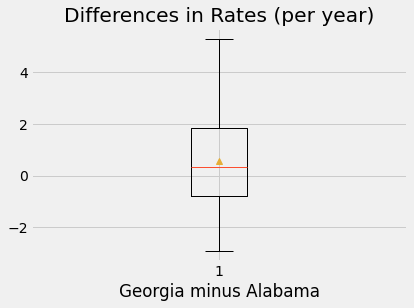

In [3]:
Difference = GA.sort("Year").column("Murder Rate") - AL.sort("Year").column("Murder Rate")

plots.boxplot(Difference, showmeans= True)
plots.title("Differences in Rates (per year)")
plots.xlabel("Georgia minus Alabama");

In [7]:
import scipy.stats

scipy.stats.ttest_rel(GA.column("Murder Rate"), AL.column("Murder Rate"))

Ttest_relResult(statistic=1.8652219662926415, pvalue=0.06898323125568459)

In [9]:
#help(scipy.stats.ttest_rel)

Help on function ttest_rel in module scipy.stats.stats:

ttest_rel(a, b, axis=0, nan_policy='propagate')
    Calculate the T-test on TWO RELATED samples of scores, a and b.
    
    This is a two-sided test for the null hypothesis that 2 related or
    repeated samples have identical average (expected) values.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        t-statistic
    pvalue : float or array
        two-tailed p-value
    
    Notes
    -----
    Examples for the use are sco

### Reporting Out ###

#### With such a small p-value (0.034), we would conclude that (for some reason) the murder rate tended to be higher in Georgia over this time period. ###

# Matching by State

If we focus on two particular years, like 1971 and 1973 (the years before and after the death penalty was banned), we can use the states to match the data.  

In [ ]:
In71 = murder_rates.where("Year", 1971).sort("State").column("Murder Rate")

In73 = murder_rates.where("Year", 1973).sort("State").column("Murder Rate")

scipy.stats.ttest_rel(In73, In71)


In [ ]:
plots.boxplot(In73-In71, showmeans =True)
plots.xlabel("Increase in Murder Rates ('73-'71)")
plots.title("The Differences per State");

For some reason, the murder rate did go up from 1971 to 1973.  

What if we take out the states that did not have the death penalty in 1971, again.

In [6]:
non_death_penalty_states = 'Alaska Hawaii Maine Michigan Wisconsin Minnesota'

murder_new = murder_rates.where("State", are.not_contained_in(non_death_penalty_states))

In71_new = murder_new.where("Year", 1971).sort("State").column("Murder Rate")

In73_new = murder_new.where("Year", 1973).sort("State").column("Murder Rate")

scipy.stats.ttest_rel(In73_new, In71_new)


Ttest_relResult(statistic=3.3476176756133893, pvalue=0.0017020343031811927)

# Age Example

When a man and a woman are in a relationship, does the man tend to be older?

This too should be considered paired data.  We didn't ask "Do men tend to be older?", we asked about people in a relationship. 


In [11]:
survey = Table.read_table("FirstDaySurveys.csv")

survey.show(3)

Gender,Cadet,Athlete,Resident,Hand,Rank,FavPrimColor,ShirtColor,GuessDist,ActualDist,LeftHandSpan,RightHandSpan,AgeYears,MotherAge,FatherAge,AgeDays
F,N,N,Y,R,FR,BE,BK,160,240,17,18,18,39,42,6866
F,N,N,N,R,FR,BE,WE,30,16,18,17.5,17,41,43,6560
F,N,N,N,R,FR,BE,RD,35,35,19,19,17,48,51,6366


In [12]:
scipy.stats.ttest_rel(survey.column("MotherAge"), survey.column("FatherAge"))

Ttest_relResult(statistic=-5.395809345161361, pvalue=3.9569289880053465e-07)

In [9]:
AgeDiff = survey.column("FatherAge") - survey.column("MotherAge") 

np.average(AgeDiff )

2.081081081081081

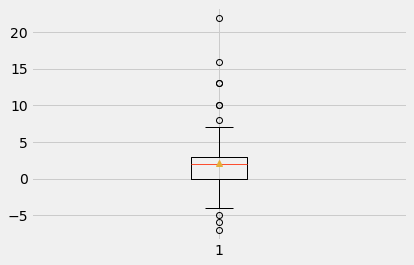

In [20]:
plots.boxplot(AgeDiff, showmeans=True);

# Sandwich Example

Suppose we wanted to know whether JayJay's Sandwiches or Wirehouse Subs would most likely be the most popular in Dahlonega (perhaps we're considering opening a franchise and want to know which company we should contact).  We purchase sandwiches from both shops with similar descriptions and we give samples to 10 random people (in random order) and ask them to complete a survey.  Their answers were tabulated to create a rating each sample on a scale from 1 to 10 (10 being the best rating).  


In [11]:
Rater = np.arange(1, 11)

JJ = make_array(6.1, 5.2, 9.8, 4.1, 6.7, 8.7, 8.5, 7.2, 9.1, 4.3)

WH = make_array(6.4, 5.3, 9.9, 4.3, 6.9, 8.9, 8.4, 7.4, 9.3, 4.5)


ds = Table().with_columns("Rater", Rater, "JJ", JJ, "WH", WH)

ds.show()

Rater,JJ,WH
1,6.1,6.4
2,5.2,5.3
3,9.8,9.9
4,4.1,4.3
5,6.7,6.9
6,8.7,8.9
7,8.5,8.4
8,7.2,7.4
9,9.1,9.3
10,4.3,4.5


In [12]:
scipy.stats.ttest_rel(JJ, WH)

Ttest_relResult(statistic=-4.706787243316419, pvalue=0.0011095173158219783)

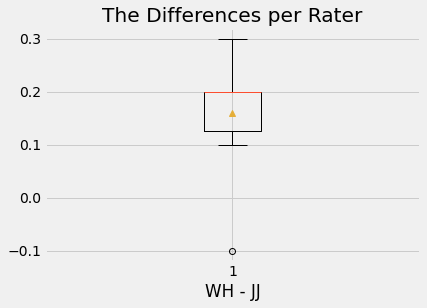

In [13]:
plots.boxplot(WH-JJ, showmeans =True)
plots.xlabel("WH - JJ")
plots.title("The Differences per Rater");

## Why not 2-sample t-test ##

If the data is truly paired the matched pairs t-test is appropriate and the 2-sample t-test is NOT.  First of all, the alternate name for the 2-sample t-test is the independent samples t-test.  If the data is paired, is can't be independent, so you can't very well use the **independent** samples t-test on data is NOT **independent**, can you?

But it's not just that.  If the data is paired, the matched pairs t-test can actually be more powerful than the 2-sample t-test. 

In [14]:
# Inappropriate test

scipy.stats.ttest_ind(JJ, WH)

Ttest_indResult(statistic=-0.17726544532392513, pvalue=0.8612793587490941)

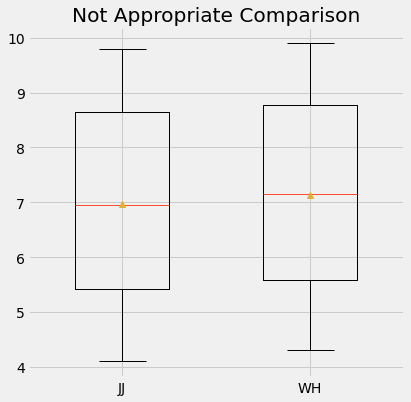

In [15]:
# To make side-by-side boxplots for two groups, 
# copy this cell and only change the next four lines

group1 = JJ  # Change to data for first group
group2 = WH # Change to data for second group
labels = make_array("JJ", "WH")  # Change to appropriate labels
my_title = "Not Appropriate Comparison"  # Change to your title

## Make no changes below here but do copy

ticks=make_array(2.5, 3.5)  
plots.figure(figsize=(6, 6))
plots.boxplot(group1, widths=.5, positions=make_array(ticks.item(0)), showmeans=True)
plots.boxplot(group2, widths=.5, positions=make_array(ticks.item(1)), showmeans=True)
plots.xticks(ticks, labels)
plots.title(my_title); 

### Why is the paired test more powerful in this case? ###

For a two-sample t-test this is the formula for the test statistic:

$$ t = \frac{\overline{x}_1-\overline{x}_2}{\sqrt{\frac{S_1^2}{N_1}  + \frac{S_2^2}{N_2}}}$$

For a matched pairs t-test this is the formula for the test statistic:

$$ t = \frac{\overline{x}_{\Delta}}{\sqrt{\frac{S^2_\Delta}{N}}} = \frac{\overline{x}_{\Delta}}{\frac{S_\Delta}{\sqrt{N}}} $$


Frequently, $\displaystyle \sqrt{\frac{S^2_\Delta}{N}} = \frac{S_\Delta}{\sqrt{N}}$ is a lot smaller than  $\displaystyle \sqrt{\frac{S_1^2}{N_1}  + \frac{S_2^2}{N_2}}$.  

Let's see that this is true in our current example, and let's discuss what this implies in class.  


In [16]:
## Finding S_1
stats.tstd(JJ)

2.034726298820338

In [17]:
## Finding S_2

stats.tstd(WH)

2.0016937272664315

In [18]:
## Finding S_diff

stats.tstd(WH-JJ)

0.10749676997731417

In [21]:
## Finding pooled standard error for the 2-sample

(2.034726298820338**2/10+ 2.0016937272664315**2/10)**(1/2)

0.9026011793083859

In [22]:
(0.10198039027185586**2/10)**(1/2)

0.032249030993194254

In [23]:
0.9026011793083859/ 0.032249030993194254


27.9884744288555

## Why aren't we discussing degrees of freedom and looking at t-distribution graphs? ###

It turns out that a matched pairs t-test is really just a 1-sample t-test operating on the difference between measurements per subject.  So we already did enough of that back when we studied the 1-sample t-test.  The degrees of freedom are the number of pairs minus 1 and the t-distribution looks the same as it did last time.  
